In [1]:
import os
from sklearn import preprocessing
os.chdir("C:/Users/Mohd Tabish Nehal/Desktop/ML(JN)/Dataset")

In [2]:
# importing data into python
import numpy as np
import pandas as pd
data=pd.read_csv("3DPrintMaterial.csv")   # reading the csv file

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
layer_height          50 non-null float64
wall_thickness        50 non-null int64
infill_density        50 non-null int64
infill_pattern        50 non-null object
nozzle_temperature    50 non-null int64
bed_temperature       50 non-null int64
print_speed           50 non-null int64
material              50 non-null object
fan_speed             50 non-null int64
roughness             50 non-null int64
tension_strenght      50 non-null int64
elongation            50 non-null float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [4]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


Multiplying the columns (layer_height & elongation) by 100 to make them more understandable

In [5]:
data.layer_height=data.layer_height*100
data.elongation=data.elongation*100

In [6]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,grid,220,60,40,abs,0,25,18,120.0
1,2.0,7,90,honeycomb,225,65,40,abs,25,32,16,140.0
2,2.0,1,80,grid,230,70,40,abs,50,40,8,80.0
3,2.0,4,70,honeycomb,240,75,40,abs,75,68,10,50.0
4,2.0,6,90,grid,250,80,40,abs,100,92,5,70.0


# Exploratory Data Analysis

In [7]:
# describes the descriptive statistics
data.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,10.600000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,167.200000
std,6.439673,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,78.818831
min,2.000000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,40.000000
25%,6.000000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,110.000000
50%,10.000000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,155.000000
75%,15.000000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,217.500000
max,20.000000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,330.000000


In [8]:
# correlation
data.corr()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
layer_height,1.000000e+00,-0.192571,3.498560e-03,-6.077595e-18,0.000000e+00,-0.055501,0.000000e+00,0.801341,0.338230,0.507583
wall_thickness,-1.925714e-01,1.000000,1.025762e-01,-1.184929e-01,-2.932662e-02,-0.419531,-2.932662e-02,-0.226987,0.399849,0.176364
infill_density,3.498560e-03,0.102576,1.000000e+00,2.386137e-01,1.600823e-18,-0.094304,2.561317e-18,0.118389,0.358464,0.159009
nozzle_temperature,-6.077595e-18,-0.118493,2.386137e-01,1.000000e+00,6.024534e-01,0.000000,6.024534e-01,0.348611,-0.405908,-0.527447
bed_temperature,0.000000e+00,-0.029327,1.600823e-18,6.024534e-01,1.000000e+00,0.000000,1.000000e+00,0.192142,-0.252883,-0.300871
print_speed,-5.550085e-02,-0.419531,-9.430408e-02,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.121066,-0.264590,-0.234052
fan_speed,0.000000e+00,-0.029327,2.561317e-18,6.024534e-01,1.000000e+00,0.000000,1.000000e+00,0.192142,-0.252883,-0.300871
roughness,8.013409e-01,-0.226987,1.183890e-01,3.486108e-01,1.921416e-01,0.121066,1.921416e-01,1.000000,0.051617,0.098962
tension_strenght,3.382296e-01,0.399849,3.584644e-01,-4.059076e-01,-2.528832e-01,-0.264590,-2.528832e-01,0.051617,1.000000,0.838109
elongation,5.075830e-01,0.176364,1.590088e-01,-5.274466e-01,-3.008708e-01,-0.234052,-3.008708e-01,0.098962,0.838109,1.000000


In [9]:
# covariance
data.cov()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
layer_height,4.146939e+01,-3.624490,5.714286e-01,1.758231e-15,7.250436e-17,-10.612245,3.625218e-16,511.053061,19.440816,257.632653
wall_thickness,-3.624490e+00,8.542449,7.604082e+00,-5.132653e+00,-6.122449e-01,-36.408163,-3.061224e+00,-65.701633,10.431020,40.628571
infill_density,5.714286e-01,7.604082,6.433061e+02,8.969388e+01,2.900174e-16,-71.020408,1.450087e-15,297.375510,81.151020,317.877551
nozzle_temperature,1.758231e-15,-5.132653,8.969388e+01,2.196429e+02,6.377551e+01,0.000000,3.188776e+02,511.663265,-53.693878,-616.122449
bed_temperature,7.250436e-17,-0.612245,2.900174e-16,6.377551e+01,5.102041e+01,0.000000,2.551020e+02,135.918367,-16.122449,-169.387755
print_speed,-1.061224e+01,-36.408163,-7.102041e+01,0.000000e+00,0.000000e+00,881.632653,0.000000e+00,356.000000,-70.122449,-547.755102
fan_speed,3.625218e-16,-3.061224,1.450087e-15,3.188776e+02,2.551020e+02,0.000000,1.275510e+03,679.591837,-80.612245,-846.938776
roughness,5.110531e+02,-65.701633,2.973755e+02,5.116633e+02,1.359184e+02,356.000000,6.795918e+02,9807.758776,45.626122,772.473469
tension_strenght,1.944082e+01,10.431020,8.115102e+01,-5.369388e+01,-1.612245e+01,-70.122449,-8.061224e+01,45.626122,79.666939,589.616327
elongation,2.576327e+02,40.628571,3.178776e+02,-6.161224e+02,-1.693878e+02,-547.755102,-8.469388e+02,772.473469,589.616327,6212.408163


In [10]:
data.pivot_table(data,index='infill_pattern')

,bed_temperature,elongation,fan_speed,infill_density,layer_height,nozzle_temperature,print_speed,roughness,tension_strenght,wall_thickness
infill_pattern,,,,,,,,,,
grid,70,163.6,50,57.6,10.6,224,64,177.28,20.00,4.80
honeycomb,70,170.8,50,49.2,10.6,219,64,163.88,20.16,5.64


In [11]:
data.pivot_table(data,index='material')

,bed_temperature,elongation,fan_speed,infill_density,layer_height,nozzle_temperature,print_speed,roughness,tension_strenght,wall_thickness
material,,,,,,,,,,
abs,70,136.4,50,60.0,10.6,233,64,193.44,17.52,4.88
pla,70,198.0,50,46.8,10.6,210,64,147.72,22.64,5.56


In [12]:
data['material'].value_counts()

pla    25
abs    25
Name: material, dtype: int64

In [13]:
data['infill_pattern'].value_counts()

honeycomb    25
grid         25
Name: infill_pattern, dtype: int64

In [14]:
data['fan_speed'].unique()

array([  0,  25,  50,  75, 100], dtype=int64)

In [15]:
# Extracting the grid pattern data only
grid_pattern=data[data['infill_pattern'].str.contains('grid')]

In [16]:
grid_pattern.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,grid,220,60,40,abs,0,25,18,120.0
2,2.0,1,80,grid,230,70,40,abs,50,40,8,80.0
4,2.0,6,90,grid,250,80,40,abs,100,92,5,70.0
6,2.0,5,10,grid,205,65,40,pla,25,55,12,130.0
8,2.0,9,70,grid,215,75,40,pla,75,24,27,140.0


In [17]:
# Replacing the abs by 0 & pla by 1
data['material'].replace(['abs','pla'],[0,1],inplace=True)

In [18]:
# Replacing the grid by 0 and honeycomb by 1
data['infill_pattern'].replace(['grid','honeycomb'],[0,1],inplace=True)

In [19]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


In [20]:
data.tail()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
45,20.0,5,60,1,200,60,40,1,0,321,28,270.0
46,20.0,4,20,0,205,65,40,1,25,265,14,180.0
47,20.0,5,60,1,210,70,40,1,50,278,30,320.0
48,20.0,7,40,0,215,75,40,1,75,244,29,320.0
49,20.0,3,60,1,220,80,40,1,100,220,27,310.0


In [21]:
# Separating input parameters and prediction materials
y_data=data.iloc[:,7].values
x_data=data.drop(["material"],axis=1)

In [22]:
y_data

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
x_data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,0,220,60,40,0,25,18,120.0
1,2.0,7,90,1,225,65,40,25,32,16,140.0
2,2.0,1,80,0,230,70,40,50,40,8,80.0
3,2.0,4,70,1,240,75,40,75,68,10,50.0
4,2.0,6,90,0,250,80,40,100,92,5,70.0


In [24]:
abs_data=data[data.material==0]
pla_data=data[data.material==1]

In [25]:
abs_data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


In [26]:
pla_data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
5,2.0,10,40,1,200,60,40,1,0,60,24,110.0
6,2.0,5,10,0,205,65,40,1,25,55,12,130.0
7,2.0,10,10,1,210,70,40,1,50,21,14,150.0
8,2.0,9,70,0,215,75,40,1,75,24,27,140.0
9,2.0,8,40,1,220,80,40,1,100,30,25,170.0


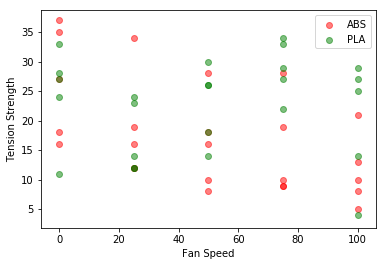

In [27]:
# Scatter plot
import matplotlib.pyplot as plt
plt.scatter(abs_data.fan_speed,abs_data.tension_strenght,color="red",label="ABS",alpha=0.5)
plt.scatter(pla_data.fan_speed,pla_data.tension_strenght,color="green",label="PLA",alpha=0.5)
plt.xlabel("Fan Speed")
plt.ylabel("Tension Strength")
plt.legend()
plt.show()

As We can observe, as the fan speed increases, Tension (Strength) for ABS decreases.
So air circulation is not good for ABS

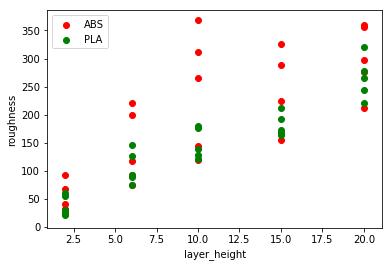

In [28]:
plt.scatter(abs_data.layer_height,abs_data.roughness,color="red",label="ABS")
plt.scatter(pla_data.layer_height,pla_data.roughness,color="green",label="PLA")
plt.xlabel("layer_height")
plt.ylabel("roughness")
plt.legend()
plt.show()

As the layer hieght increases, roughness increases but PLA increases smoother than ABS

In [29]:
#Apply normalization to rescale the features to a standard range of values.
#Normalize the numeric variables from column0 to column 6 and column8 to column11 in the dataframe
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x_data).transform(x_data)

array([[0.        , 0.77777778, 1.        , 0.        , 0.4       ,
        0.        , 0.        , 0.        , 0.01152738, 0.42424242,
        0.27586207],
       [0.        , 0.66666667, 1.        , 1.        , 0.5       ,
        0.25      , 0.        , 0.25      , 0.03170029, 0.36363636,
        0.34482759],
       [0.        , 0.        , 0.875     , 0.        , 0.6       ,
        0.5       , 0.        , 0.5       , 0.05475504, 0.12121212,
        0.13793103],
       [0.        , 0.33333333, 0.75      , 1.        , 0.8       ,
        0.75      , 0.        , 0.75      , 0.13544669, 0.18181818,
        0.03448276],
       [0.        , 0.55555556, 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.20461095, 0.03030303,
        0.10344828],
       [0.        , 1.        , 0.375     , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.11239193, 0.60606061,
        0.24137931],
       [0.        , 0.44444444, 0.        , 0.        , 0.

In [30]:
# splitting the dataset into training and test set
from sklearn import neighbors
from sklearn.model_selection import cross_validate,train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=1)

In [31]:
x_train

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
42,20.0,7,30,0,230,70,40,50,298,28,220.0
49,20.0,3,60,1,220,80,40,100,220,27,310.0
26,10.0,4,40,0,205,65,120,25,176,12,120.0
22,10.0,1,50,0,230,70,120,50,265,10,90.0
13,6.0,6,10,1,240,75,60,75,200,9,80.0
41,20.0,9,90,1,225,65,40,25,276,34,310.0
17,6.0,8,30,1,210,70,60,50,88,26,160.0
45,20.0,5,60,1,200,60,40,0,321,28,270.0
24,10.0,2,60,0,250,80,120,100,368,8,40.0
23,10.0,9,80,1,240,75,120,75,312,19,80.0


In [32]:
x_test

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
27,10.0,3,50,1,210,70,120,50,128,18,180.0
35,15.0,3,80,1,200,60,60,0,192,33,280.0
40,20.0,4,80,0,220,60,40,0,212,35,330.0
38,15.0,6,40,0,215,75,60,75,172,22,230.0
2,2.0,1,80,0,230,70,40,50,40,8,80.0
3,2.0,4,70,1,240,75,40,75,68,10,50.0
48,20.0,7,40,0,215,75,40,75,244,29,320.0
29,10.0,1,30,1,220,80,120,100,121,14,150.0
46,20.0,4,20,0,205,65,40,25,265,14,180.0
31,15.0,7,10,1,225,65,60,25,154,19,180.0


In [33]:
y_train=y_train.astype(int)
y_train

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [34]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

# kNN Classifier

In [35]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
# predict on test data
y_pred=clf.predict(x_test)

In [37]:
print("Actual 3D Print Material")
print(y_test)

Actual 3D Print Material
[1 1 0 1 0 0 1 1 1 0 0 1 0 1 1]


In [38]:
print("Predicted 3D Print Material")
print(y_pred)

Predicted 3D Print Material
[1 1 1 1 0 0 1 0 1 1 0 0 0 1 1]


In [39]:
# Accuracy Score on test and train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("Accuracy Score: %f"%(accuracy_score(y_test,y_pred)*100))
print("Recall Score: %f"%(recall_score(y_test,y_pred)*100))
print("ROC Score: %f"%(roc_auc_score(y_test,y_pred)*100))
print("Confusion_matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy Score: 73.333333
Recall Score: 77.777778
ROC Score: 72.222222
Confusion_matrix: 
 [[4 2]
 [2 7]]


 3 nn score: 0.6666666666666666 
 4 nn score: 0.6666666666666666 
 5 nn score: 0.7333333333333333 
 6 nn score: 0.7333333333333333 
 7 nn score: 0.6666666666666666 
 8 nn score: 0.7333333333333333 
 9 nn score: 0.6666666666666666 
 10 nn score: 0.6 
 11 nn score: 0.4666666666666667 
 12 nn score: 0.6 
 13 nn score: 0.5333333333333333 
 14 nn score: 0.6 


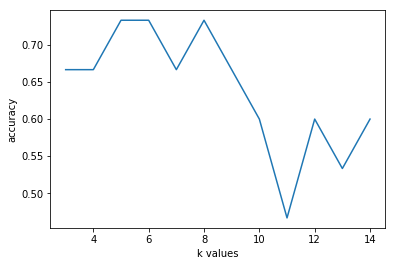

In [40]:
score_list = []
for each in range(3,15):
    clf=neighbors.KNeighborsClassifier(n_neighbors = each)
    clf.fit(x_train,y_train)
    score_list.append(clf.score(x_test,y_test))
    print(" {} nn score: {} ".format(each,clf.score(x_test,y_test)))
    
plt.plot(range(3,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [41]:
# Predict the probability of each test data point
# get the probability distribution
probas=clf.predict_proba(x_test)

In [42]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [43]:
#Evaluation Metrics
from sklearn.model_selection import cross_val_score,cross_val_predict

In [44]:
#Print cross validation score for kNN
clf_acc = cross_val_score(clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)

In [45]:
clf_proba = cross_val_predict(clf, x_train_std, y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] # get the score of the positive class 

In [46]:
clf_acc

array([0.61538462, 0.63636364, 0.72727273])

# Support Vector Classification

In [47]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(x_train,y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
#Print cross validation score for SVC
svc_acc = cross_val_score(svc_classifier, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, x_train_std, y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
#Predict on test data
y_pred=svc_classifier.predict(x_test)

In [50]:
print("Actual 3D Print Material : ")
print(y_test)

Actual 3D Print Material : 
[1 1 0 1 0 0 1 1 1 0 0 1 0 1 1]


In [51]:
print("Predicted 3D Print Material : ")
print(y_pred)

Predicted 3D Print Material : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [52]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 40.000000
Recall score : 0.000000
ROC score : 50.000000

[[6 0]
 [9 0]]


# Decision Tree Classifier

In [53]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, x_train_std, y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]

In [54]:
#Predict on test data
y_pred=dtc_clf.predict(x_test)

In [55]:
print("Actual 3D Print Material : ")
print(y_test)

Actual 3D Print Material : 
[1 1 0 1 0 0 1 1 1 0 0 1 0 1 1]


In [56]:
print("Predicted 3D Print Material : ")
print(y_pred)

Predicted 3D Print Material : 
[1 1 0 1 0 0 1 0 1 0 0 0 0 1 1]


In [57]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 86.666667
Recall score : 77.777778
ROC score : 88.888889

[[6 0]
 [2 7]]


# Random Forest Classifier

In [58]:
#Build Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rmf_clf = rmf.fit(x_train, y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rmf_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, x_train_std, y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]

In [60]:
rmf_clf_acc

array([0.76923077, 0.63636364, 0.63636364])

In [61]:
#Predict on test data
y_pred=rmf_clf.predict(x_test)

In [62]:
print("Actual 3D Print Material : ")
print(y_test)

Actual 3D Print Material : 
[1 1 0 1 0 0 1 1 1 0 0 1 0 1 1]


In [63]:
print("Predicted 3D Print Material : ")
print(y_pred)

Predicted 3D Print Material : 
[1 1 0 1 0 0 1 1 1 0 0 0 0 1 1]


In [64]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 93.333333
Recall score : 88.888889
ROC score : 94.444444

[[6 0]
 [1 8]]


In [65]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (kNN): 0.75 


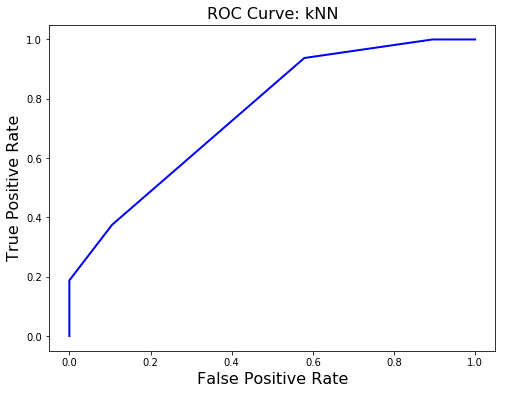

AUC Score (Support Vector Classification): 0.45 


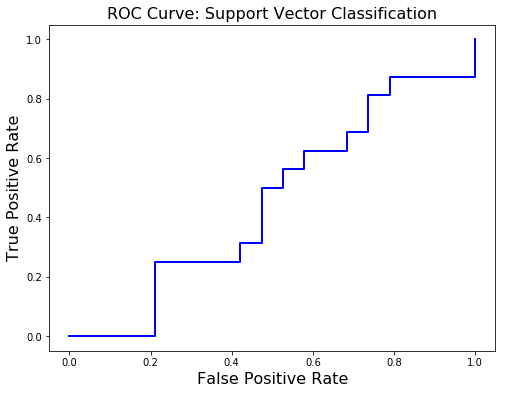

AUC Score (Decision Tree Classifier): 0.82 


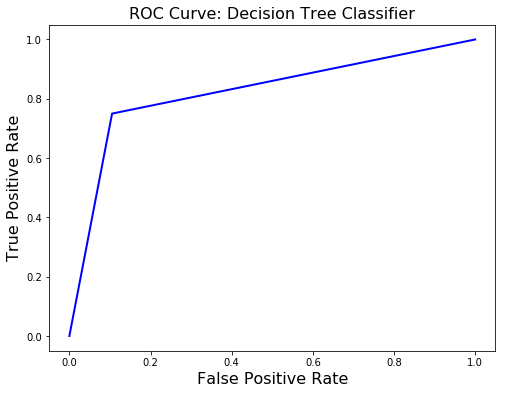

AUC Score (Random Forest Classifier): 0.73 


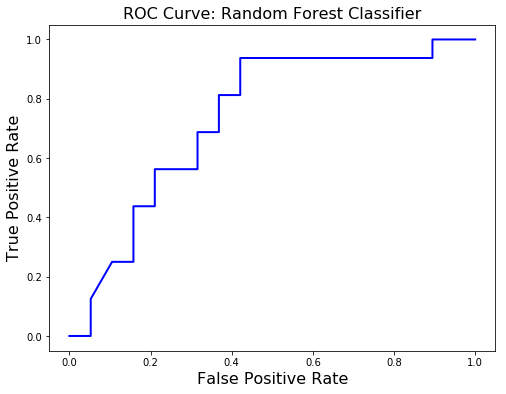

In [66]:
#Plotting ROC Curve for each algorithm
ROC_curve('kNN', y_train, clf_scores)
ROC_curve('Support Vector Classification',y_train,svc_scores)
ROC_curve('Decision Tree Classifier',y_train,dtc_clf_scores)
ROC_curve('Random Forest Classifier',y_train,rmf_clf_scores)